https://github.com/cstjean/ScikitLearn.jl/blob/master/examples/Decision_Tree_Regression_Julia.ipynb

In [2]:
using DecisionTree
using ScikitLearn, Random, Statistics
using PyPlot

size(X) == (50, 1): true
size(y) == (50, 1): true


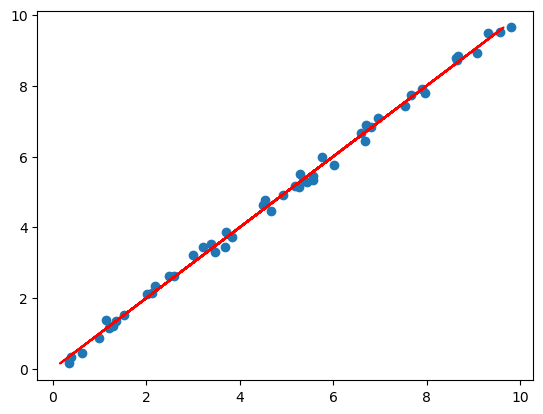

([2.000354580427846;;], [0.24917905200544663])

In [55]:
# Create 50 1-dimensional samples
X = 5 * rand(50, 1)
y = 2 .*(X).+0.5.*rand(50, 1)
println("size(X) == (50, 1): $(size(X) == (50, 1))")
println("size(y) == (50, 1): $(size(y) == (50, 1))")
# Every 5 points are shifted by a random amount
#y[1:5:end] += 10 * (0.5 .- rand(10))

# Create model
lr = ScikitLearn.Models.LinearRegression(multi_output=false)

# Train the model
fit!(lr, X, y)

# Prediction
y_pred = predict(lr, X)

#Plot
fig2 = scatter(y_pred, y) # Plot our approximation 
plot(y, y, "r-")
(lr.coefs,lr.intercepts)

In [84]:
# Create 50 2-dimensional samples
X = rand(50, 2)
y = mapslices(x -> rand().*x[1] + x[2] +5, X, dims=2)
println("size(X) == (50, 2): $(size(X) == (50, 2))")
println("size(y) == (50, 1): $(size(y) == (50, 1))")
# Create model
lr = ScikitLearn.Models.LinearRegression(multi_output=false)

# Train the model
fit!(lr, X, y)
# Use the trained model to predict values of y
y_pred = predict(lr, X)

(lr.coefs,lr.intercepts)

size(X) == (50, 2): true
size(y) == (50, 1): true


([0.48866393260290514; 1.0623650840813788;;], [4.9589942931754765])

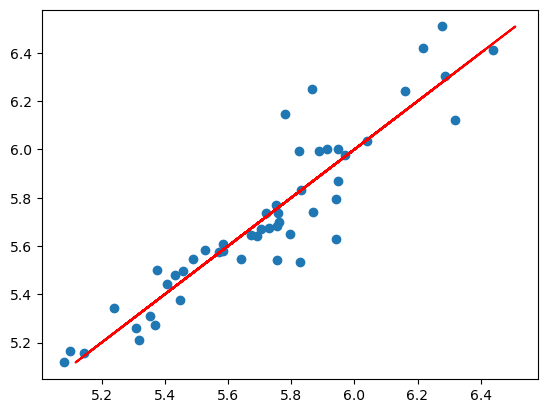

PyObject <matplotlib.collections.PathCollection object at 0x000002C21863C400>

In [99]:
plot(y,y,"r-")
p1 = scatter(y_pred, y)
